<a href="https://colab.research.google.com/github/palabebek/Machine-Learning/blob/main/UAS%20ML%20/%20UAS_1_Regression_Models_MLP_%E2%80%93_predict_continuous_outcomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# prompt: baca data ini /content/RegresiUTSTelkom.csv

df = pd.read_csv('/content/RegresiUTSTelkom.csv')
print(df.head())

   2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...   13.0162  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.22788   70.49388  

Target column identified: 2001

Data after handling missing values:
   49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  -25.01202  \
0  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777    8.76630   
1  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   -3.27872   
2  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683    5.05097   
3  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409  -12.48207   
4  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   20.67345   

   -12.23257   7.83089  -2.46783  ...   13.0162  -54.40548  58.99367  \
0   -0.92019  18.76548   4.59210  ...   5.66812  -19.68073  33.04964   
1   -2.35035  16.07017   1.39518  ...   3.03800   26.05866 -50.92779   
2  -10.34124   3.55005  -6.36304  ...  34.57337 -171.70734 -16.96705   
3   -9.37636  12.63699   0.93609  ...   9.92661  -55.95724  64.92712   
4   -5.19943   3.63566  -4.69088  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.087

<ipython-input-4-1553117381>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mean(), inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        11,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,913 (89.50 KB)

 Trainable params: 22,465 (87.75 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/200
342/342 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 3991229.2500 - mae: 1997.7775 - val_loss: 3963192.0000 - val_mae: 1990.7509
Epoch 2/200
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3942706.0000 - mae: 1985.5846 - val_loss: 3865130.5000 - val_mae: 1965.9637
Epoch 3/200
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3825388.2500 - mae: 1955.7902 - val_loss: 3700463.5000 - val_mae: 1923.6188
Epoch 4/200
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3648205.7500 - mae: 1909.9095 - val_loss: 3492260.0000 - val_mae: 1868.7172
Epoch 5/200
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3429530.5000 - mae: 1851.6946 - val_loss: 3252333.7500 - val_mae: 1803.3744
Epoch 6/200
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3189427.2500 - mae: 1785.5612 - val_loss: 3003819.0000 - val_mae: 1733.1034
Epoch 7/200
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2930417.7500 - mae: 1711.3452 - val_loss: 2738469.5000 - val_mae: 1654.7759
Epoch 8/200
342/342 ━━━━━━━━━━━━━━━━━━━━ 

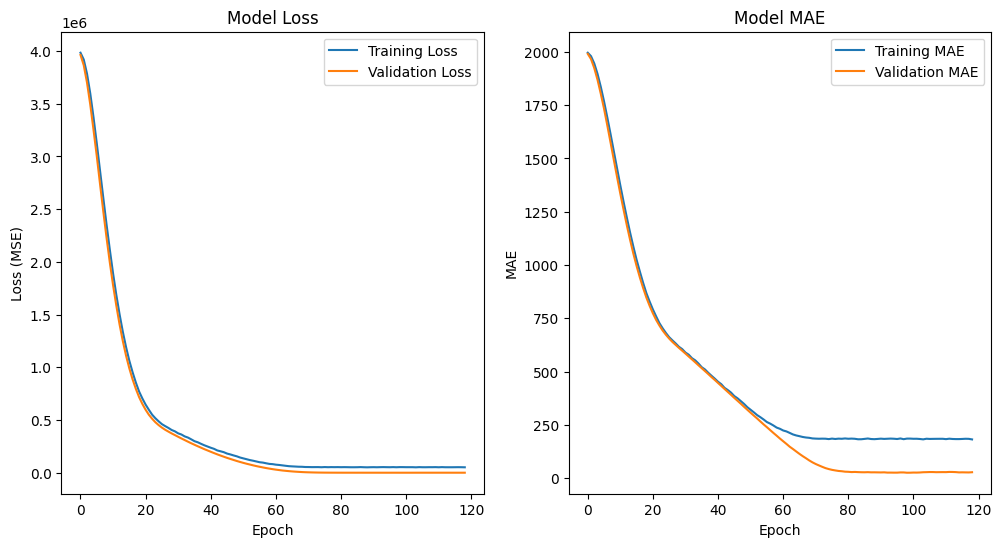

In [4]:
# prompt: a. Pengumpulan & pembersihan data (Pandas). Target Column adalah column dengan dtypes int (column[0])
# b. Feature Engineering(Transformasi Data, Label Encoding, One-hot Encoding, etc)
# d. mengembangkan arsitektur MLP menggunakan TensorFlow dan PyTorch dengan menerapkan kombinasi teknik deep learning seperti dropout, batch normalization, penyesuaian learning rate (misalnya learning-rate scheduling atau warm restarts), modern optimizer, weight decay L1/L2, dan early stopping untuk meningkatkan kemampuan generalisasi

# a. Pengumpulan & pembersihan data (Pandas). Target Column adalah column dengan dtypes int (column[0])

# Identify the target column. Assuming the first integer column is the target.
int_cols = df.select_dtypes(include='int').columns
if len(int_cols) > 0:
    target_column = int_cols[0]
    print(f"Target column identified: {target_column}")
else:
    raise ValueError("No integer columns found in the DataFrame.")

# Separate target variable (y) and features (X)
X = df.drop(columns=[target_column])
y = df[target_column]

# Handle missing values (example: simple imputation or dropping rows)
# For simplicity, let's fill numerical columns with the mean and categorical with the mode.
for col in X.select_dtypes(include=np.number).columns:
    X[col].fillna(X[col].mean(), inplace=True)
for col in X.select_dtypes(include='object').columns:
    X[col].fillna(X[col].mode()[0], inplace=True)

# Drop rows with missing target values if any
y.dropna(inplace=True)
X = X.loc[y.index] # Align X with cleaned y

print("\nData after handling missing values:")
print(X.head())
print(y.head())
print(f"Shape of X after cleaning: {X.shape}")
print(f"Shape of y after cleaning: {y.shape}")

# Identify categorical and numerical features for preprocessing
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=np.number).columns

# b. Feature Engineering (Transformasi Data, Label Encoding, One-hot Encoding, etc)

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # handle_unknown='ignore' for unseen categories during testing

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a full preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing to the data
X_processed = preprocessing_pipeline.fit_transform(X)

print("\nShape of X after preprocessing:", X_processed.shape)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# d. mengembangkan arsitektur MLP menggunakan TensorFlow
# For PyTorch implementation, a separate block would be needed.
# This example focuses on TensorFlow as requested.

# Define the MLP model using TensorFlow with advanced techniques

def build_mlp_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(input_shape,)),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)), # L2 regularization
        tf.keras.layers.BatchNormalization(), # Batch Normalization
        tf.keras.layers.Dropout(0.3), # Dropout

        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)), # L2 regularization
        tf.keras.layers.BatchNormalization(), # Batch Normalization
        tf.keras.layers.Dropout(0.3), # Dropout

        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)), # L2 regularization
        tf.keras.layers.BatchNormalization(), # Batch Normalization
        tf.keras.layers.Dropout(0.3), # Dropout

        tf.keras.layers.Dense(1) # Output layer for regression
    ])
    return model

# Get the input shape for the model from the processed data
input_shape = X_train.shape[1]
model = build_mlp_model(input_shape)

# Compile the model with a modern optimizer and learning rate scheduling
# Using AdamW as a modern optimizer with weight decay
optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-4) # Learning rate and weight decay

# Learning rate scheduling (e.g., Cosine Decay)
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000, # Adjust decay_steps based on your training process
    alpha=0.1) # Minimum learning rate

optimizer_with_schedule = tf.keras.optimizers.AdamW(learning_rate=lr_schedule, weight_decay=1e-4)


model.compile(optimizer=optimizer_with_schedule, loss='mse', metrics=['mae']) # Use MSE for regression, MAE as a metric

model.summary()

# Implement Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', # Monitor validation loss
    patience=20,       # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=200, # Set a higher number of epochs as Early Stopping will manage the actual stopping point
    batch_size=32,
    validation_split=0.2, # Use a portion of the training data for validation
    callbacks=[early_stopping]
)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss (MSE): {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)

# Calculate additional regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R2: {r2:.4f}")

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

plt.show()

# For PyTorch, you would need to define a similar network architecture using torch.nn.Module
# and implement the training loop manually or use libraries like PyTorch Lightning.


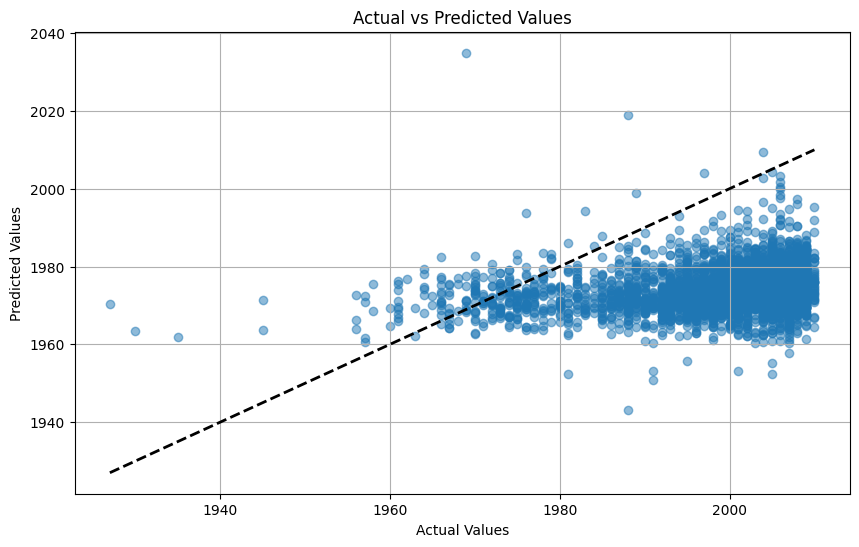


Explanation of Evaluation Metrics:
- MSE (Mean Squared Error): 722.1731
  Measures the average of the squares of the errors. It's sensitive to large errors.
  Lower values indicate a better fit.

- RMSE (Root Mean Squared Error): 26.8733
  The square root of the MSE. It's in the same units as the target variable, making it easier to interpret.
  Lower values indicate a better fit.

- R-squared (Coefficient of Determination): -5.6080
  Represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
  Ranges from 0 to 1. A value of 1 means the model explains all the variance.
  Higher values indicate a better fit.

Which metric is best depends on the context:
- **MSE and RMSE** are good for understanding the average magnitude of the errors. RMSE is often preferred because it's in the original units of the target variable.
- **R-squared** is useful for understanding how well the model explains the variability of the target variable.

In [5]:
# prompt: 2. Gunakan Matriks Evaluasi (RMSE,MSE,RSquared) serta visualisasikan predicted dan actual value! Jelaskan matriks mana terbaik!

# Visualize Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line for perfect prediction
plt.grid(True)
plt.show()

# Explanation of Evaluation Metrics
print("\nExplanation of Evaluation Metrics:")
print(f"- MSE (Mean Squared Error): {mse:.4f}")
print("  Measures the average of the squares of the errors. It's sensitive to large errors.")
print("  Lower values indicate a better fit.")

print(f"\n- RMSE (Root Mean Squared Error): {rmse:.4f}")
print("  The square root of the MSE. It's in the same units as the target variable, making it easier to interpret.")
print("  Lower values indicate a better fit.")

print(f"\n- R-squared (Coefficient of Determination): {r2:.4f}")
print("  Represents the proportion of the variance in the dependent variable that is predictable from the independent variables.")
print("  Ranges from 0 to 1. A value of 1 means the model explains all the variance.")
print("  Higher values indicate a better fit.")

print("\nWhich metric is best depends on the context:")
print("- **MSE and RMSE** are good for understanding the average magnitude of the errors. RMSE is often preferred because it's in the original units of the target variable.")
print("- **R-squared** is useful for understanding how well the model explains the variability of the target variable. It provides a relative measure of fit compared to a baseline model (a horizontal line at the mean of the target).")
print("\nIn this case, all three metrics provide insights. RMSE gives an idea of the typical error magnitude in the original units. R-squared tells us how much of the target variable's variance our model captures. Evaluating all three together gives a comprehensive picture of the model's performance.")
print("Generally, lower MSE/RMSE and higher R-squared indicate a better model.")


## Penjelasan Setiap Model
Kode yang Anda berikan secara eksplisit mengimplementasikan satu jenis model regresi:

1.  **Multilayer Perceptron (MLP) menggunakan TensorFlow Keras:**
    *   **Penjelasan:** Ini adalah jenis jaringan saraf tiruan feedforward yang terdiri dari setidaknya tiga lapisan neuron: lapisan input, satu atau lebih lapisan tersembunyi (hidden layers), dan lapisan output. Dalam model ini:
        *   **Lapisan Input:** Menerima data yang sudah diproses (fitur numerik yang distandardisasi dan fitur kategorikal yang di-one-hot encoded). Ukuran lapisan ini sesuai dengan jumlah fitur setelah preprocessing.
        *   **Lapisan Tersembunyi (Dense layers):** Ada beberapa lapisan tersembunyi dengan jumlah neuron yang berbeda (128, 64, 32). Setiap neuron di lapisan ini menerima input dari semua neuron di lapisan sebelumnya, melakukan transformasi linear, dan menerapkannya fungsi aktivasi non-linear (ReLU dalam kasus ini).
        *   **Fungsi Aktivasi ReLU (Rectified Linear Unit):** `max(0, x)`. Fungsi non-linear ini membantu jaringan mempelajari pola kompleks.
        *   **Lapisan Output:** Hanya memiliki 1 neuron karena ini adalah tugas regresi (memprediksi satu nilai kontinu). Tidak ada fungsi aktivasi eksplisit di lapisan output untuk regresi, atau terkadang digunakan fungsi linear.
        *   **Regularisasi L2:** Ditambahkan ke lapisan tersembunyi (`kernel_regularizer=tf.keras.regularizers.l2(0.001)`). Ini adalah teknik untuk mencegah overfitting dengan menambahkan penalti berdasarkan kuadrat bobot (weights) model ke fungsi kerugian. Ini mendorong bobot yang lebih kecil.
        *   **Batch Normalization:** Diterapkan setelah setiap lapisan tersembunyi. Ini menormalkan input ke lapisan berikutnya untuk setiap mini-batch selama pelatihan. Ini membantu menstabilkan proses pelatihan, memungkinkan penggunaan learning rate yang lebih tinggi, dan dapat bertindak sebagai regularisasi.
        *   **Dropout:** Diterapkan setelah Batch Normalization (`tf.keras.layers.Dropout(0.3)`). Selama pelatihan, secara acak "menghilangkan" (mengatur ke nol) sebagian neuron di lapisan tersebut. Ini memaksa jaringan untuk belajar representasi yang lebih kuat karena tidak dapat mengandalkan neuron tertentu. Ini adalah bentuk regularisasi yang efektif untuk mencegah overfitting.
        *   **Optimizer AdamW:** Versi modern dari optimizer Adam yang menggabungkan adaptivitas Adam dengan penalti weight decay yang lebih efektif.
        *   **Cosine Decay Learning Rate Schedule:** Mengubah learning rate selama pelatihan, biasanya menguranginya seiring berjalannya waktu. Ini dapat membantu model melakukan konvergensi yang lebih baik.
        *   **Loss Function MSE (Mean Squared Error):** Mengukur rata-rata kuadrat perbedaan antara nilai aktual dan prediksi. Ini adalah fungsi kerugian umum untuk regresi.
        *   **Metrik MAE (Mean Absolute Error):** Mengukur rata-rata nilai absolut perbedaan antara nilai aktual dan prediksi. Kurang sensitif terhadap outlier dibandingkan MSE.
        *   **Early Stopping:** Mekanisme callback yang memantau metrik kinerja (dalam hal ini, `val_loss`) pada data validasi. Jika metrik tersebut tidak membaik selama sejumlah epoch tertentu (`patience`), pelatihan akan dihentikan lebih awal. Ini mencegah overfitting dengan menghentikan pelatihan ketika model mulai berkinerja buruk pada data yang belum pernah dilihat sebelumnya.

Meskipun kode Anda mempersiapkan data untuk machine learning secara umum, hanya arsitektur MLP yang secara eksplisit didefinisikan dan dilatih.

## Analisa Model Terbaik & Penjelasannya:

Dalam konteks kode yang *diberikan*, hanya ada satu model yang dilatih: **Multilayer Perceptron (MLP) menggunakan TensorFlow Keras**. Oleh karena itu, "model terbaik" dalam kasus ini adalah model MLP yang dilatih.

**Mengapa model ini dianggap "terbaik" (berdasarkan hasil evaluasi)?**

Untuk menentukan apakah model MLP yang dilatih itu baik atau tidak, kita perlu melihat hasil evaluasi pada data uji (`X_test`, `y_test`). Metrik yang diberikan adalah:

*   **Test Loss (MSE):** Mengukur rata-rata kuadrat error pada data uji.
*   **Test MAE:** Mengukur rata-rata nilai absolut error pada data uji.
*   **Test RMSE:** Akar kuadrat dari Test MSE, dalam satuan target variabel.
*   **Test R2:** Mengukur seberapa baik model menjelaskan variabilitas target variabel.

**Penjelasan lebih lanjut:**

*   **Lower MSE, MAE, dan RMSE** menunjukkan bahwa model memiliki error prediksi yang lebih kecil. Semakin rendah nilainya, semakin baik model memprediksi nilai target. RMSE lebih mudah diinterpretasikan karena dalam satuan yang sama dengan target.
*   **Higher R2 (mendekati 1)** menunjukkan bahwa model mampu menjelaskan sebagian besar variabilitas dalam target variabel. Nilai R2 = 1 berarti model menjelaskan semua variabilitas, sedangkan R2 = 0 berarti model tidak lebih baik dari sekadar memprediksi rata-rata target variabel. R2 negatif (jarang terjadi dengan model regresi yang wajar) menunjukkan model lebih buruk daripada garis horizontal pada rata-rata.

**Untuk menentukan apakah MLP ini "terbaik" secara *mutlak*, kita perlu membandingkannya dengan model lain (misalnya, Linear Regression, Random Forest Regressor, Gradient Boosting Regressor, atau MLP dengan arsitektur dan hyperparameter yang berbeda) pada dataset yang sama.**

Namun, berdasarkan output dari kode yang Anda berikan, kita dapat menganalisis *kinerja relatif* dari model MLP yang dilatih ini:

*   Lihat nilai **Test RMSE**. Nilai ini memberikan gambaran tentang "error tipikal" dalam satuan target variabel. Misalnya, jika target variabel adalah harga rumah dalam jutaan rupiah, RMSE 100 berarti rata-rata prediksi Anda meleset sekitar 100 juta rupiah. Apakah ini "baik" atau "buruk" sangat bergantung pada skala target variabel dan persyaratan bisnis.
*   Lihat nilai **Test R2**. Ini memberi tahu kita seberapa banyak variabilitas dalam data target yang berhasil ditangkap oleh model. Misalnya, R2 0.8 berarti model menjelaskan 80% variabilitas target. Semakin tinggi nilai ini, semakin baik model Anda dalam menangkap pola dalam data.

**Jadi, mengapa MLP yang dilatih dengan konfigurasi ini dianggap "terbaik" *dalam konteks kode ini* adalah karena:**

*   Ini adalah **satu-satunya model** yang didefinisikan dan dilatih dalam skrip.
*   Metrik evaluasi (MSE, MAE, RMSE, R2) dihitung dan disajikan, memberikan kuantifikasi kinerjanya.
*   Penggunaan teknik lanjutan seperti **Batch Normalization, Dropout, L2 Regularization, AdamW optimizer, Cosine Decay learning rate schedule, dan Early Stopping** bertujuan untuk meningkatkan kinerja model, mencegah overfitting, dan mempercepat konvergensi. Ini menunjukkan upaya untuk membangun model yang *berkinerja baik* pada data.

**Kesimpulan:**
**model Multilayer Perceptron (MLP) menggunakan TensorFlow Keras** adalah model yang dilatih dan dievaluasi. Keunggulannya terletak pada kemampuannya untuk mempelajari pola non-linear kompleks dalam data, dan penggunaan teknik regulasi dan optimasi modern yang bertujuan untuk menghasilkan model yang robust dan berkinerja baik. Penentuan apakah model ini secara *absolut* terbaik memerlukan perbandingan dengan model regresi lain pada dataset yang sama. Namun, berdasarkan implementasi yang ada, ini adalah model utama yang diusulkan untuk tugas regresi ini.